#  We have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not

# import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load titanic data

In [3]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# what are all the columns present
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

descriptions of features:

    PassengerID— ID of each passenger
    Survived— Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
    Pclass— The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
    Sex— The passenger's sex
    Age— The passenger's age in years
    SibSp— The number of siblings or spouses the passenger had aboard the Titanic
    Parch— The number of parents or children the passenger had aboard the Titanic
    Ticket— The passenger's ticket number
    Fare— The fare the passenger paid
    Cabin— The passenger's cabin number
    Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [34]:
col = titanic.columns
print (col)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [35]:
print("Shape of titanic datset: {}".format(titanic.shape))

Shape of titanic datset: (891, 12)


In [36]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [37]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# which columns have none of nan values

age, cabin, embarked

In [44]:
[print(columns,np.unique(titanic[columns].isnull())) for columns in col]

PassengerId [False]
Survived [False]
Pclass [False]
Name [False]
Sex [False]
Age [False  True]
SibSp [False]
Parch [False]
Ticket [False]
Fare [False]
Cabin [False  True]
Embarked [False  True]


[None, None, None, None, None, None, None, None, None, None, None, None]

unique vavues in each columns

In [43]:
list((columns,np.unique(titanic[columns].astype(str)).size) for columns in col)

[('PassengerId', 891),
 ('Survived', 2),
 ('Pclass', 3),
 ('Name', 891),
 ('Sex', 2),
 ('Age', 89),
 ('SibSp', 7),
 ('Parch', 7),
 ('Ticket', 681),
 ('Fare', 248),
 ('Cabin', 148),
 ('Embarked', 4)]

# Survived column contains 0 if the passenger did not survive and 1 if they did,



# Survival based on gender of passenger

In [9]:
print ("total_females = ", len(titanic[(titanic["Sex"] == "female")].index))
print ("total_males = " , len(titanic[(titanic["Sex"] == "male")].index))

total_females =  314
total_males =  577


In [10]:
##how many males survived????

survived = titanic[(titanic["Sex"] == "male") & (titanic["Survived"] == 1)]
len(survived.index)

109

this method is called boolean masking for querying data

In [11]:
#how many females survived???
survived = titanic[(titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
len(survived.index)

233

In [12]:
print([titanic.groupby("Sex")["Survived"].value_counts(normalize = True)])

[Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64]


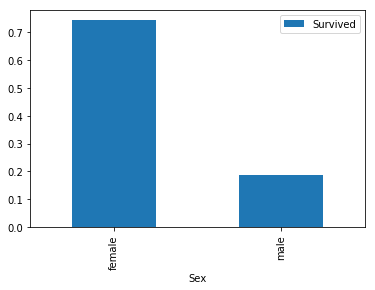

In [13]:
class_pivot = titanic.pivot_table(index="Sex",values="Survived")
class_pivot.plot.bar()
plt.show()

# Survival based on passenger class

In [14]:
#which passenger class curvived how much
survived_class = [titanic.groupby("Pclass")["Survived"].sum()]

print(survived_class)

[Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64]


In [15]:
print([titanic.groupby("Pclass")["Survived"].value_counts(normalize = True)])

[Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64]


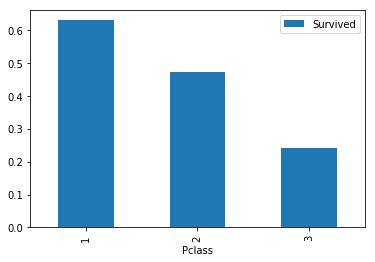

In [16]:
class_pivot = titanic.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

finding pearson correlation coefficient

In [17]:
correlation_matrix = titanic.corr(method='pearson')

correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


we are interested in relation of other features with whether the passenger survived  and we can see that passenger class PClass is an important parameter for determining if the passenger survived fare is also giving high value but fare is in relation with Pclass. this doesnot give the complete picture as the survived class is not a continous variable but still we can get the idea

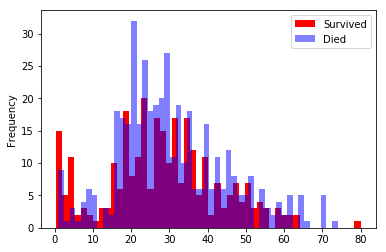

In [18]:
#looking at the age factor for the survival
survived = titanic[titanic["Survived"] == 1]
died = titanic[titanic["Survived"] == 0]
survived["Age"].plot.hist(color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

the relationship is not clear but we can see that in some age range more passenger survived

filling missing values in age column

In [19]:
# fill missing values fill missing age by mean of the age column

titanic["Age"]= titanic["Age"].fillna(titanic['Age'].mean(), inplace = False)

# cabin and embarked are non integer values so we cant fill them

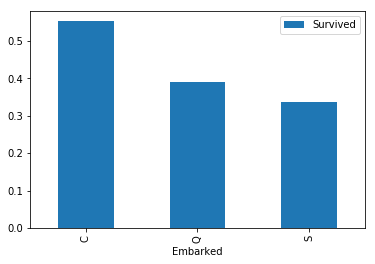

In [20]:
class_pivot = titanic.pivot_table(index="Embarked",values="Survived")
class_pivot.plot.bar()
plt.show()

so we have seen that age, passenger class, gender and embarkement point are the important features of the dataset

# dropping rows where embarked is NAN

In [21]:
titanic = titanic.dropna(subset = ["Sex","Pclass","Embarked","Age"])

In [22]:
titanic.shape

(889, 12)

In [23]:
Y_titanic = titanic.loc[:,"Survived"]
X_titanic = titanic.loc[:,["Age","Sex","Pclass","Embarked"]]

here the embarked and sex column is categorical in nature so we have to convert it

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age = scaler.fit_transform(X_titanic["Age"].reshape(-1,1))
X_titanic["Age"] = age

#X_train[:,0] = res_0.ravel()
#X_train = X_train.loc[:,["Age","Sex","Pclass","Embarked"]]

C:\Users\asoni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
X_titanic_he = pd.get_dummies(X_titanic, columns = ["Pclass","Sex","Embarked"])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_he, Y_titanic, test_size = 0.3, random_state = 0)

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split = 70, min_samples_leaf= 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7790262172284644

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,min_samples_split = 50)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7715355805243446

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7528089887640449

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7528089887640449

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7677902621722846